In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
common_drugs = pd.read_csv('../data/common_drugs_all_list.csv', sep=';')
common_drugs

,drug_name
0,lexaurin
1,fraxiparine
2,novalgin
3,dithiaden
4,diazepam
...,...
1478,daxas
1479,ecosal inhaler
1480,corvaton forte
1481,ibustrin


In [3]:
ddi = pd.read_csv('../data/triplets/ddi.tsv', sep='\t', index_col=[0])
dfi = pd.read_csv('../data/triplets/dfi.tsv', sep='\t', index_col=[0])
ddfi = pd.concat([ddi, dfi])
ddfi

,drug1,interaction,drug2
0,DB06605,increase_anticoagulant_activities,DB00001
1,DB06695,increase_anticoagulant_activities,DB00001
2,DB01254,increase_bleeding,DB00001
3,DB01254,increase_hemorrhage,DB00001
4,DB01609,increase_gastrointestinal_bleeding,DB00001
...,...,...,...
1506,DB15982,increase_effectiveness,food
1507,DB16165,decrease_effectiveness,grapefruit
1508,DB16261,increase_effectiveness,a high fat meal
1509,DB16390,decrease_effectiveness,St. John's Wort


In [4]:
db_atc = pd.read_csv('../data/triplets/drug_atc_codes.tsv', sep='\t', index_col=[0])
db_atc

,id,relation,atc_code
1,DB00001,has_atc_code,B01AE02
2,DB00002,has_atc_code,L01XC06
3,DB00003,has_atc_code,R05CB13
4,DB00004,has_atc_code,L01XX29
5,DB00005,has_atc_code,L04AB01
...,...,...,...
4015,DB15598,has_atc_code,B03AB10
4016,DB15874,has_atc_code,A16AB03
4017,DB16024,has_atc_code,V04CX01
4018,DB16581,has_atc_code,L04AX08


In [5]:
dlp = pd.read_csv('../data/dlp_lecivepripravky.csv', encoding='latin2', sep=';')
dlp = dlp[['NAZEV', 'ATC_WHO']].drop_duplicates()
dlp['NAZEV'] = dlp['NAZEV'].str.lower()
dlp['NAZEV'] = dlp.NAZEV.str.split().str.get(0)
dlp = dlp.drop_duplicates()
dlp

,NAZEV,ATC_WHO
0,acylcoffin,N02BA51
1,diluran,S01EC01
2,hydrochlorothiazid,C03AA03
3,prednison,H02AB07
4,pyridoxin,A11HA02
...,...,...
62755,zypadhera,N05AH03
62815,azarga,S01ED51
62828,vidaza,L01BC07
62860,szczepionka,J07AN01


In [6]:
items = list(ddfi.drug1)

In [7]:
items_counts = Counter(items)
items_counts = dict(items_counts.most_common())
items_counts

{'DB14881': 2456,
 'DB00908': 2158,
 'DB00477': 2008,
 'DB00363': 1995,
 'DB00458': 1955,
 'DB00321': 1940,
 'DB01149': 1929,
 'DB01142': 1924,
 'DB00091': 1919,
 'DB00564': 1918,
 'DB00390': 1913,
 'DB00661': 1900,
 'DB01267': 1876,
 'DB00909': 1853,
 'DB09241': 1852,
 'DB01224': 1850,
 'DB00682': 1848,
 'DB00502': 1839,
 'DB01233': 1832,
 'DB00176': 1824,
 'DB13954': 1812,
 'DB08910': 1812,
 'DB01115': 1807,
 'DB13956': 1806,
 'DB00285': 1804,
 'DB00312': 1798,
 'DB00482': 1797,
 'DB01242': 1790,
 'DB00795': 1780,
 'DB00476': 1779,
 'DB00270': 1778,
 'DB00328': 1777,
 'DB01015': 1777,
 'DB01151': 1777,
 'DB00398': 1773,
 'DB13952': 1772,
 'DB00333': 1772,
 'DB00688': 1770,
 'DB01036': 1769,
 'DB06700': 1767,
 'DB00783': 1766,
 'DB00280': 1766,
 'DB00999': 1765,
 'DB09118': 1763,
 'DB04896': 1762,
 'DB00193': 1757,
 'DB01069': 1748,
 'DB00608': 1744,
 'DB00537': 1741,
 'DB01166': 1739,
 'DB00897': 1738,
 'DB00934': 1736,
 'DB00951': 1730,
 'DB00501': 1722,
 'DB01035': 1720,
 'DB00864'

In [8]:
items_counts_df = pd.DataFrame({'db_id': items_counts.keys(), 'count': items_counts.values()})
items_counts_df.describe()

,count
count,2547.000000
mean,660.652925
std,541.791988
min,1.000000
25%,132.000000
50%,565.000000
75%,1112.500000
max,2456.000000


In [9]:
only_one_item = items_counts_df[items_counts_df['count'] == 1]
print(only_one_item.shape)
print(list(only_one_item.db_id))

(65, 2)
['DB00965', 'DB09096', 'DB15595', 'DB12293', 'DB01237', 'DB01160', 'DB00194', 'DB14015', 'DB11590', 'DB11653', 'DB00992', 'DB00768', 'DB02266', 'DB06755', 'DB03754', 'DB09056', 'DB11282', 'DB06202', 'DB00183', 'DB11237', 'DB11068', 'DB11142', 'DB00826', 'DB01243', 'DB12924', 'DB11074', 'DB08987', 'DB11502', 'DB09342', 'DB03255', 'DB13153', 'DB16405', 'DB09120', 'DB00600', 'DB00121', 'DB00137', 'DB00507', 'DB00874', 'DB00878', 'DB03147', 'DB03247', 'DB05382', 'DB06775', 'DB09138', 'DB09144', 'DB09313', 'DB09397', 'DB09420', 'DB09490', 'DB09510', 'DB09563', 'DB11065', 'DB11066', 'DB11072', 'DB11180', 'DB11186', 'DB11610', 'DB11835', 'DB11938', 'DB12095', 'DB12982', 'DB13147', 'DB13198', 'DB14116', 'DB14548']


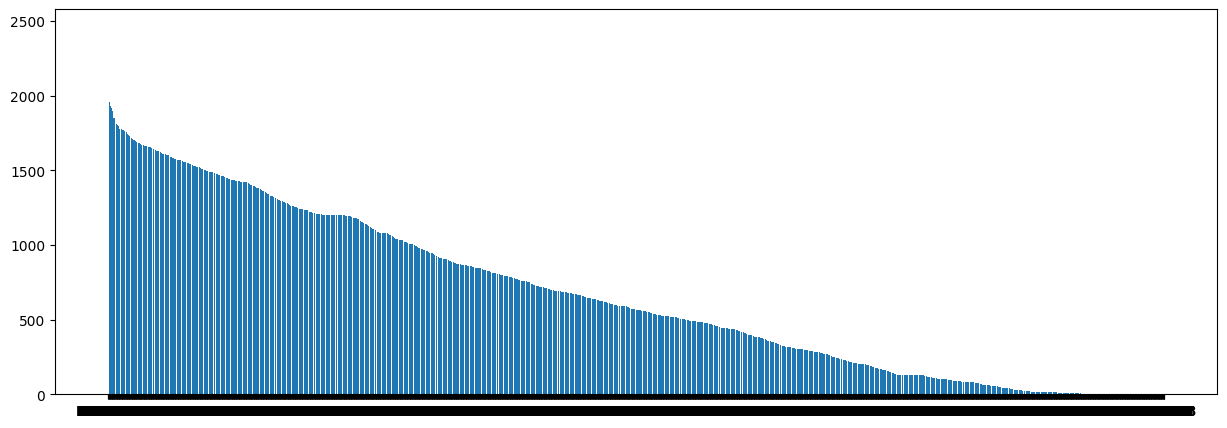

In [10]:
fig = plt.figure(figsize = (15, 5))
plt.bar(x=items_counts.keys(), height=items_counts.values())
plt.show()

In [11]:
# map drugbank id to ATC code

items_counts_df_atc = pd.merge(items_counts_df, db_atc, how='left', left_on='db_id', right_on='id')
items_counts_df_atc = items_counts_df_atc[['db_id', 'count', 'atc_code']]
items_counts_df_atc

,db_id,count,atc_code
0,DB14881,2456,NaN
1,DB00908,2158,C01BA01
2,DB00908,2158,C01BA51
3,DB00908,2158,C01BA71
4,DB00477,2008,N05AA01
...,...,...,...
4197,DB13147,1,NaN
4198,DB13198,1,A09AC01
4199,DB13198,1,A09AA03
4200,DB14116,1,NaN


In [12]:
common_drugs_merged = pd.merge(common_drugs, dlp, how='left', left_on='drug_name', right_on='NAZEV')
common_drugs_merged = common_drugs_merged[['drug_name', 'ATC_WHO']]
common_drugs_merged.to_csv('../data/common_drugs_all.csv', sep=';')
common_drugs_merged

,drug_name,ATC_WHO
0,lexaurin,N05BA08
1,fraxiparine,B01AB06
2,novalgin,N02BB02
3,dithiaden,R06AX
4,diazepam,N05BA01
...,...,...
1580,daxas,R03DX07
1581,ecosal inhaler,NaN
1582,corvaton forte,NaN
1583,ibustrin,B01AC10


In [13]:
common_drugs_merged['ATC_WHO'].isna().sum()

115

In [14]:
common_drugs_merged = common_drugs_merged.dropna()
common_drugs_merged

,drug_name,ATC_WHO
0,lexaurin,N05BA08
1,fraxiparine,B01AB06
2,novalgin,N02BB02
3,dithiaden,R06AX
4,diazepam,N05BA01
...,...,...
1577,vectibix,L01FE02
1578,lonsurf,L01BC59
1579,amlodipine,C08CA01
1580,daxas,R03DX07


In [18]:
common_drugs_interaction_counts = pd.merge(common_drugs_merged, items_counts_df_atc, how='left', left_on='ATC_WHO', right_on='atc_code')
common_drugs_interaction_counts = common_drugs_interaction_counts.rename(columns={'count': 'num_interactions'})
common_drugs_interaction_counts['num_interactions'] = common_drugs_interaction_counts['num_interactions'].fillna(0)
# common_drugs_interaction_counts.to_csv('../data/common_drugs_num_interactions.csv', sep=';')
common_drugs_interaction_counts

,drug_name,ATC_WHO,db_id,num_interactions,atc_code
0,lexaurin,N05BA08,DB01558,1497.0,N05BA08
1,fraxiparine,B01AB06,DB08813,621.0,B01AB06
2,novalgin,N02BB02,DB04817,1438.0,N02BB02
3,dithiaden,R06AX,NaN,0.0,NaN
4,diazepam,N05BA01,DB00829,1714.0,N05BA01
...,...,...,...,...,...
1582,vectibix,L01FE02,NaN,0.0,NaN
1583,lonsurf,L01BC59,DB00432,1351.0,L01BC59
1584,amlodipine,C08CA01,DB00381,804.0,C08CA01
1585,daxas,R03DX07,DB01656,1488.0,R03DX07


Number of common drugs that are not in DrugBank (at first 100 positions): 15


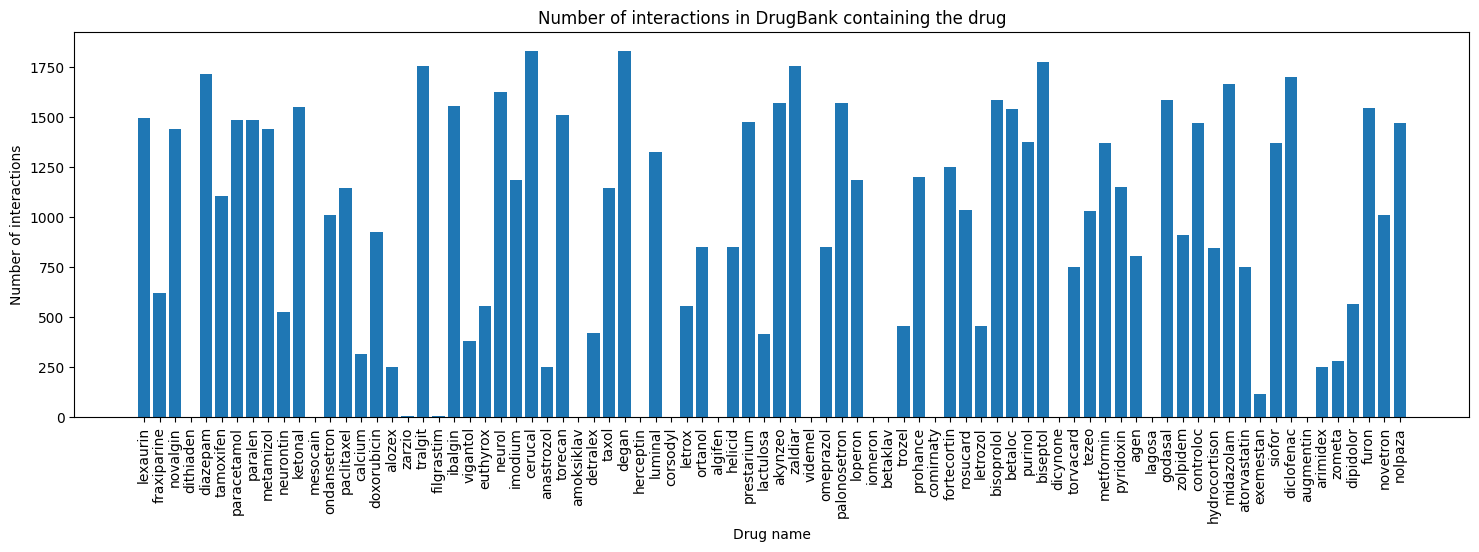

In [21]:
# sorted according to how common the drug is according to the list (how many patient use the drug)

common_drugs_interaction_counts_short = common_drugs_interaction_counts.head(100)

print('Number of common drugs that are not in DrugBank (at first 100 positions):', 
      common_drugs_interaction_counts_short[common_drugs_interaction_counts_short['num_interactions'] == 0].shape[0])

fig = plt.figure(figsize = (18, 5))
plt.bar(x=common_drugs_interaction_counts_short.drug_name, height=common_drugs_interaction_counts_short.num_interactions)
plt.xticks(rotation=90)
plt.xlabel('Drug name')
plt.ylabel('Number of interactions')
plt.title('Number of interactions in DrugBank containing the drug')
plt.show()

In [26]:
common_drugs_interaction_counts.describe()

,num_interactions
count,1587.000000
mean,874.041588
std,581.987304
min,0.000000
25%,388.000000
50%,910.000000
75%,1431.000000
max,1940.000000


In [71]:
only_one_item = common_drugs_interaction_counts[common_drugs_interaction_counts['num_interactions'] == 1]
print(only_one_item.shape)
only_one_item

(13, 3)


,drug_name,atc_code,num_interactions
517,bepanthen,D08AC52,1.0
811,octreoscan,V09IB01,1.0
1184,ofnol,S01GX09,1.0
526,guajacuran,R05CA03,1.0
583,loceryl,D01AE16,1.0
1380,drill,R02AA05,1.0
46,corsodyl,A01AB03,1.0
758,cyteal,D08AC52,1.0
308,wobenzym,M09AB52,1.0
973,pimafucin,G01AA02,1.0


In [72]:
zero_item = common_drugs_interaction_counts[common_drugs_interaction_counts['num_interactions'] == 0]
print(zero_item.shape)
zero_item

(209, 3)


,drug_name,atc_code,num_interactions
1519,ketosteril,NaN,0.0
1442,ophthalmo-framykoin,NaN,0.0
1563,sulperazon,NaN,0.0
1582,vectibix,NaN,0.0
65,comirnaty,NaN,0.0
...,...,...,...
1165,libtayo,NaN,0.0
1153,piqray,NaN,0.0
1150,herbadent,NaN,0.0
1145,irinotecan,NaN,0.0
